## Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid") 
import datetime
from time import strptime
import time

## Loading dataset

In [3]:
train_original = pd.read_csv(r"C:\Users\sanjay\Desktop\Haikujam\BuyAffinity_Train.txt",delimiter='\t')
test_original = pd.read_csv(r"C:\Users\sanjay\Desktop\Haikujam\BuyAffinity_Test.txt",delimiter='\t')

In [4]:
train = train_original.copy()
test = test_original.copy()

In [5]:
train.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,...,-3433637453,10/4/1986,9/6/1992,2,1,706,305,1,2,0
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,...,609277486,2/24/1979,1/5/1983,1,1,423,206,18,7,1
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,...,-8977995005,1/12/1989,11/22/1986,2,1,703,315,1,4,0
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,...,4868760308,2/18/1982,6/10/1992,1,1,122,304,15,1,0
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,...,9757408267,4/10/1987,10/19/1985,1,1,486,240,1,1,0


In [6]:
test.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
0,T30234341,0.654765,0.812009,0.603190,0.391039,-5220,4825,-1784,7447,-7147,...,8074343777,5553595074,9/17/1996,8/18/1990,1,1,436,478,1,1
1,T30234342,0.694636,0.690568,0.473460,0.259760,-618,-5018,2012,9259,9267,...,-5556861821,2216284070,11/7/1985,4/11/1990,1,1,138,56,10,4
2,T30234343,0.203759,0.323301,0.492294,0.011448,-8778,6141,6965,3774,4303,...,-2121815725,-315409510,7/9/1984,5/4/1997,1,1,117,323,10,1
3,T30234344,0.319627,0.286247,0.906197,0.093840,-7929,4471,7715,9543,335,...,1389754605,-3360224957,6/3/1987,7/1/1988,1,1,115,149,16,21
4,T30234345,0.236003,0.782784,0.285689,0.383585,-3296,4564,-1580,-8559,-27,...,3653338555,7604838279,7/17/1984,12/3/1993,1,1,527,281,3,1


In [7]:
train.shape

(101180, 24)

In [8]:
train.describe()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F12,F13,F14,F17,F18,F19,F20,F21,F22,C
count,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,...,1.011800e+05,1.011800e+05,1.011800e+05,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000
mean,50590.500000,0.502348,0.501497,0.499886,0.499839,-29.742617,1.511000,7.939118,16.434147,9.927812,...,6.921685e+06,1.127538e+07,-5.198163e+07,1.339593,1.335027,387.181479,387.333999,4.588031,4.598567,0.245375
std,29208.294456,0.288058,0.289017,0.288875,0.288729,5781.829379,5796.594007,5765.581875,5782.805211,5771.004738,...,5.771750e+09,5.786659e+09,5.782358e+09,0.894065,0.882435,235.939585,235.374285,4.775671,4.776494,0.430311
min,1.000000,0.000018,0.000004,0.000002,0.000006,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,...,-9.999754e+09,-9.999852e+09,-9.999767e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,25295.750000,0.253819,0.251115,0.248818,0.250501,-5045.000000,-5012.000000,-4979.000000,-4988.000000,-4992.250000,...,-4.991278e+09,-5.027003e+09,-5.070403e+09,1.000000,1.000000,187.000000,187.000000,1.000000,1.000000,0.000000
50%,50590.500000,0.501802,0.501095,0.499820,0.501387,-46.000000,-11.500000,16.500000,60.000000,22.500000,...,4.277384e+07,9.416236e+06,-8.816174e+07,1.000000,1.000000,374.000000,375.000000,3.000000,3.000000,0.000000
75%,75885.250000,0.753598,0.752404,0.750281,0.748803,4978.000000,5050.000000,4962.000000,5021.000000,5020.000000,...,5.008238e+09,5.032947e+09,4.947133e+09,1.000000,1.000000,560.000000,561.000000,7.000000,7.000000,0.000000
max,101180.000000,0.999986,0.999990,0.999985,0.999977,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,9.999555e+09,9.999951e+09,9.999997e+09,6.000000,6.000000,901.000000,901.000000,21.000000,21.000000,1.000000


In [9]:
train.isnull().sum()

Index    0
F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20      0
F21      0
F22      0
C        0
dtype: int64

In [10]:
train.dtypes

Index      int64
F1       float64
F2       float64
F3       float64
F4       float64
F5         int64
F6         int64
F7         int64
F8         int64
F9         int64
F10        int64
F11        int64
F12        int64
F13        int64
F14        int64
F15       object
F16       object
F17        int64
F18        int64
F19        int64
F20        int64
F21        int64
F22        int64
C          int64
dtype: object

<AxesSubplot:xlabel='F1'>

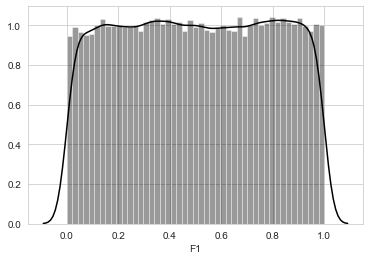

In [11]:
sns.distplot(train['F1'],kde=True,color='black')

<AxesSubplot:xlabel='F2'>

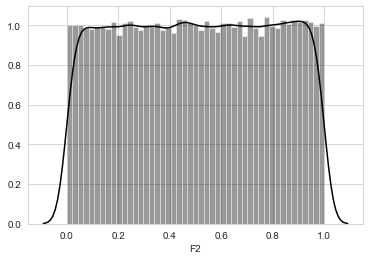

In [12]:
sns.distplot(train['F2'],kde=True,color='black')

<AxesSubplot:xlabel='F3'>

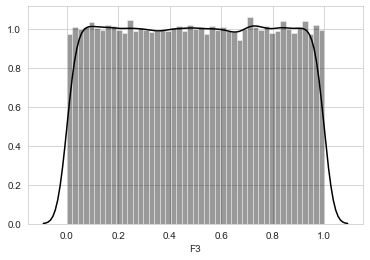

In [13]:
sns.distplot(train['F3'],kde=True,color='black')

<AxesSubplot:xlabel='F4'>

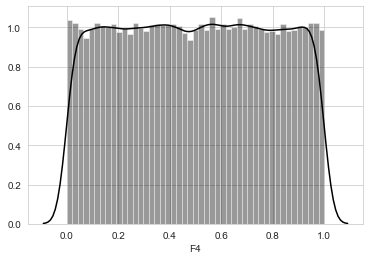

In [14]:
sns.distplot(train['F4'],kde=True,color='black')

In [15]:
# F15(date), F16(date), F17, F18

In [16]:
# 19..20..

In [17]:
# 21..22 

In [18]:
# F1, F14 SAME

In [19]:
# F15, F16 SAME

In [20]:
# train.shape

<AxesSubplot:>

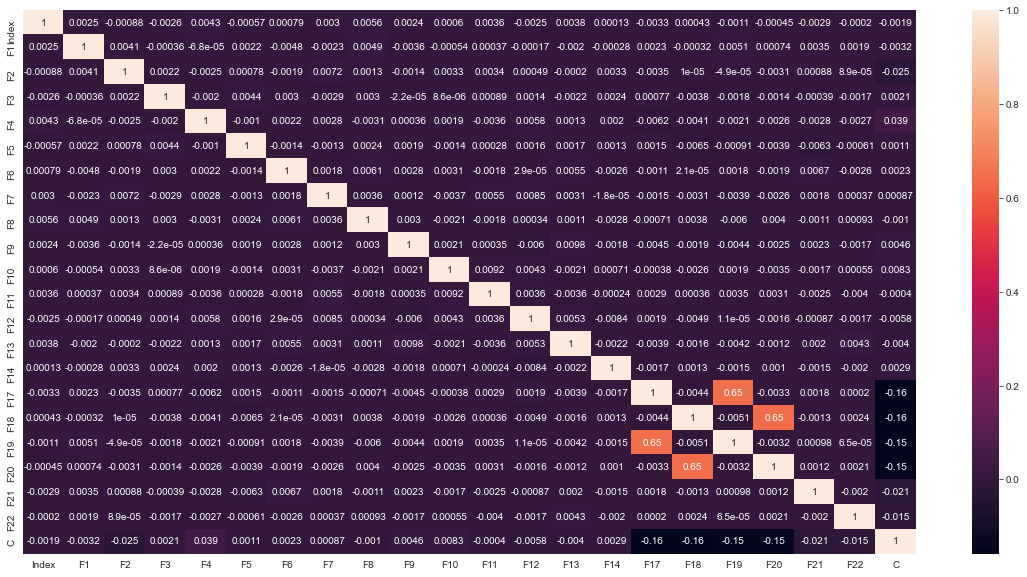

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True)

In [22]:
# F4 THEN F10..F9..F6..F14..F3..F5..

In [23]:
train.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,...,-3433637453,10/4/1986,9/6/1992,2,1,706,305,1,2,0
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,...,609277486,2/24/1979,1/5/1983,1,1,423,206,18,7,1
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,...,-8977995005,1/12/1989,11/22/1986,2,1,703,315,1,4,0
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,...,4868760308,2/18/1982,6/10/1992,1,1,122,304,15,1,0
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,...,9757408267,4/10/1987,10/19/1985,1,1,486,240,1,1,0


In [24]:
train['F15'] = pd.to_datetime(train['F15'])

In [25]:
train['F16'] = pd.to_datetime(train['F16'])

In [26]:
train.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,...,-3433637453,1986-10-04,1992-09-06,2,1,706,305,1,2,0
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,...,609277486,1979-02-24,1983-01-05,1,1,423,206,18,7,1
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,...,-8977995005,1989-01-12,1986-11-22,2,1,703,315,1,4,0
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,...,4868760308,1982-02-18,1992-06-10,1,1,122,304,15,1,0
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,...,9757408267,1987-04-10,1985-10-19,1,1,486,240,1,1,0


In [27]:
date = pd.DataFrame(train['F15'])

In [28]:
date['F16'] = train['F16']

In [29]:
date

,F15,F16
0,1986-10-04,1992-09-06
1,1979-02-24,1983-01-05
2,1989-01-12,1986-11-22
3,1982-02-18,1992-06-10
4,1987-04-10,1985-10-19
...,...,...
101175,1983-11-05,1993-01-14
101176,1990-07-21,1994-05-27
101177,1988-01-12,1993-07-12
101178,1979-11-24,1987-06-13


In [30]:
date['year'] = train['F15'].dt.year

In [31]:
date['month'] = train['F15'].dt.month

In [32]:
date['day'] = train['F15'].dt.day

In [33]:
date

,F15,F16,year,month,day
0,1986-10-04,1992-09-06,1986,10,4
1,1979-02-24,1983-01-05,1979,2,24
2,1989-01-12,1986-11-22,1989,1,12
3,1982-02-18,1992-06-10,1982,2,18
4,1987-04-10,1985-10-19,1987,4,10
...,...,...,...,...,...
101175,1983-11-05,1993-01-14,1983,11,5
101176,1990-07-21,1994-05-27,1990,7,21
101177,1988-01-12,1993-07-12,1988,1,12
101178,1979-11-24,1987-06-13,1979,11,24


In [34]:
date['year1'] = train['F16'].dt.year
date['month1'] = train['F16'].dt.month
date['day1'] = train['F16'].dt.day

In [35]:
date

,F15,F16,year,month,day,year1,month1,day1
0,1986-10-04,1992-09-06,1986,10,4,1992,9,6
1,1979-02-24,1983-01-05,1979,2,24,1983,1,5
2,1989-01-12,1986-11-22,1989,1,12,1986,11,22
3,1982-02-18,1992-06-10,1982,2,18,1992,6,10
4,1987-04-10,1985-10-19,1987,4,10,1985,10,19
...,...,...,...,...,...,...,...,...
101175,1983-11-05,1993-01-14,1983,11,5,1993,1,14
101176,1990-07-21,1994-05-27,1990,7,21,1994,5,27
101177,1988-01-12,1993-07-12,1988,1,12,1993,7,12
101178,1979-11-24,1987-06-13,1979,11,24,1987,6,13


In [36]:
date['day_name'] = date['F15'].dt.day_name()

In [37]:
date['month_name'] = date['F15'].dt.month_name()

In [38]:
date['day_name1'] = date['F16'].dt.day_name()
date['month_name1'] = date['F16'].dt.month_name()

In [39]:
date

,F15,F16,year,month,day,year1,month1,day1,day_name,month_name,day_name1,month_name1
0,1986-10-04,1992-09-06,1986,10,4,1992,9,6,Saturday,October,Sunday,September
1,1979-02-24,1983-01-05,1979,2,24,1983,1,5,Saturday,February,Wednesday,January
2,1989-01-12,1986-11-22,1989,1,12,1986,11,22,Thursday,January,Saturday,November
3,1982-02-18,1992-06-10,1982,2,18,1992,6,10,Thursday,February,Wednesday,June
4,1987-04-10,1985-10-19,1987,4,10,1985,10,19,Friday,April,Saturday,October
...,...,...,...,...,...,...,...,...,...,...,...,...
101175,1983-11-05,1993-01-14,1983,11,5,1993,1,14,Saturday,November,Thursday,January
101176,1990-07-21,1994-05-27,1990,7,21,1994,5,27,Saturday,July,Friday,May
101177,1988-01-12,1993-07-12,1988,1,12,1993,7,12,Tuesday,January,Monday,July
101178,1979-11-24,1987-06-13,1979,11,24,1987,6,13,Saturday,November,Saturday,June


In [40]:
date.drop(['month','day','month1','day1'],1,inplace=True)

In [41]:
date.head()

,F15,F16,year,year1,day_name,month_name,day_name1,month_name1
0,1986-10-04,1992-09-06,1986,1992,Saturday,October,Sunday,September
1,1979-02-24,1983-01-05,1979,1983,Saturday,February,Wednesday,January
2,1989-01-12,1986-11-22,1989,1986,Thursday,January,Saturday,November
3,1982-02-18,1992-06-10,1982,1992,Thursday,February,Wednesday,June
4,1987-04-10,1985-10-19,1987,1985,Friday,April,Saturday,October


In [42]:
date['C'] = train['C']

In [43]:
date.head()

,F15,F16,year,year1,day_name,month_name,day_name1,month_name1,C
0,1986-10-04,1992-09-06,1986,1992,Saturday,October,Sunday,September,0
1,1979-02-24,1983-01-05,1979,1983,Saturday,February,Wednesday,January,1
2,1989-01-12,1986-11-22,1989,1986,Thursday,January,Saturday,November,0
3,1982-02-18,1992-06-10,1982,1992,Thursday,February,Wednesday,June,0
4,1987-04-10,1985-10-19,1987,1985,Friday,April,Saturday,October,0


<AxesSubplot:xlabel='year'>

<Figure size 1440x720 with 0 Axes>

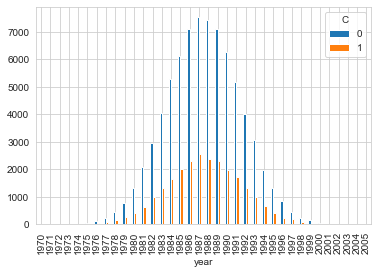

In [44]:
plt.figure(figsize=(20,10))
pd.crosstab(date['year'],date['C']).plot.bar()

In [45]:
date.describe()

,year,year1,C
count,101180.000000,101180.000000,101180.000000
mean,1987.504635,1990.497944,0.245375
std,4.012908,3.017570,0.430311
min,1970.000000,1977.000000,0.000000
25%,1985.000000,1988.000000,0.000000
50%,1987.000000,1990.000000,0.000000
75%,1990.000000,1993.000000,0.000000
max,2005.000000,2005.000000,1.000000


<AxesSubplot:xlabel='year1'>

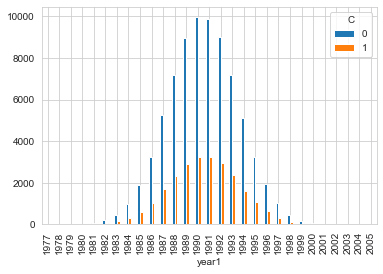

In [46]:
pd.crosstab(date['year1'],date['C']).plot.bar()

<AxesSubplot:xlabel='month_name'>

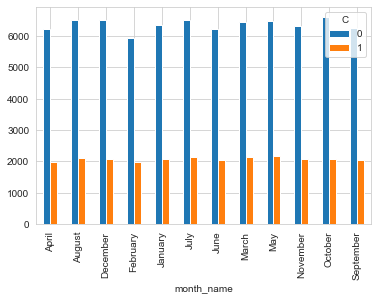

In [47]:
pd.crosstab(date['month_name'],date['C']).plot.bar()

In [48]:
pd.crosstab(date['day_name'],date['C'])

C,0,1
day_name,,
Friday,10961,3486
Monday,10822,3640
Saturday,10980,3560
Sunday,10872,3449
Thursday,10824,3485
Tuesday,11000,3622
Wednesday,10894,3585


<AxesSubplot:xlabel='month_name1'>

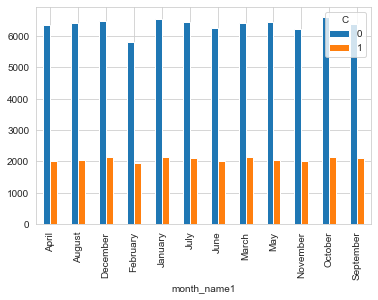

In [49]:
pd.crosstab(date['month_name1'],date['C']).plot.bar()

<AxesSubplot:xlabel='day_name1'>

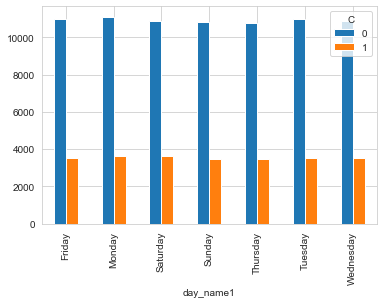

In [50]:
pd.crosstab(date['day_name1'],date['C']).plot.bar()

In [51]:
date.head()

,F15,F16,year,year1,day_name,month_name,day_name1,month_name1,C
0,1986-10-04,1992-09-06,1986,1992,Saturday,October,Sunday,September,0
1,1979-02-24,1983-01-05,1979,1983,Saturday,February,Wednesday,January,1
2,1989-01-12,1986-11-22,1989,1986,Thursday,January,Saturday,November,0
3,1982-02-18,1992-06-10,1982,1992,Thursday,February,Wednesday,June,0
4,1987-04-10,1985-10-19,1987,1985,Friday,April,Saturday,October,0


In [52]:
# keep only year 1 and year 2

In [53]:
train.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,...,-3433637453,1986-10-04,1992-09-06,2,1,706,305,1,2,0
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,...,609277486,1979-02-24,1983-01-05,1,1,423,206,18,7,1
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,...,-8977995005,1989-01-12,1986-11-22,2,1,703,315,1,4,0
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,...,4868760308,1982-02-18,1992-06-10,1,1,122,304,15,1,0
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,...,9757408267,1987-04-10,1985-10-19,1,1,486,240,1,1,0


In [54]:
# F4 THEN F10..F9..F6..F14..F3..F5..

In [55]:
pd.crosstab(train['F4'],train['C'])

C,0,1
F4,,
0.000006,1,0
0.000012,1,0
0.000022,1,0
0.000044,1,0
0.000059,1,0
...,...,...
0.999930,1,0
0.999955,0,1
0.999955,0,1


In [56]:
(train.groupby('F4')['C'].mean())*100

F4
0.000006      0.0
0.000012      0.0
0.000022      0.0
0.000044      0.0
0.000059      0.0
            ...  
0.999930      0.0
0.999955    100.0
0.999955    100.0
0.999963      0.0
0.999977      0.0
Name: C, Length: 101178, dtype: float64

<AxesSubplot:xlabel='F4'>

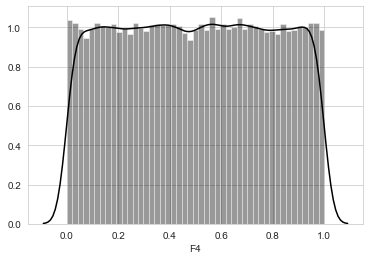

In [57]:
sns.distplot(train['F4'],kde=True,color='black')

In [58]:
pd.crosstab(train['F4'],train['C']).head(20)

C,0,1
F4,,
0.000006,1,0
0.000012,1,0
0.000022,1,0
0.000044,1,0
0.000059,1,0
0.000066,1,0
0.000069,1,0
0.000071,1,0
0.000103,1,0


In [59]:
(train.groupby('F10')['C'].mean())*100

F10
-9999815888      0.0
-9999696950      0.0
-9999079834      0.0
-9998094226    100.0
-9997953533      0.0
               ...  
 9998585962      0.0
 9998607596      0.0
 9998647192      0.0
 9998784571      0.0
 9999496706      0.0
Name: C, Length: 101179, dtype: float64

In [60]:
train['F10'].describe()

count    1.011800e+05
mean     1.869749e+07
std      5.769064e+09
min     -9.999816e+09
25%     -4.966961e+09
50%      4.346691e+07
75%      5.019440e+09
max      9.999497e+09
Name: F10, dtype: float64

In [61]:
pd.crosstab(train['F10'],train['C']).head(20)

C,0,1
F10,,
-9999815888,1,0
-9999696950,1,0
-9999079834,1,0
-9998094226,0,1
-9997953533,1,0
-9996830897,1,0
-9996463293,1,0
-9996370628,1,0
-9996075963,1,0


In [62]:
(train.groupby('F9')['C'].mean())*100

F9
-10000    25.000000
-9999      0.000000
-9998      0.000000
-9997     20.000000
-9996      0.000000
            ...    
 9996     33.333333
 9997      0.000000
 9998     33.333333
 9999     16.666667
 10000    20.000000
Name: C, Length: 19887, dtype: float64

In [63]:
pd.crosstab(train['F9'],train['C']).head(20)

C,0,1
F9,,
-10000,3,1
-9999,6,0
-9998,3,0
-9997,4,1
-9996,3,0
-9995,5,1
-9994,3,2
-9993,3,2
-9992,8,2


In [64]:
train.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,...,-3433637453,1986-10-04,1992-09-06,2,1,706,305,1,2,0
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,...,609277486,1979-02-24,1983-01-05,1,1,423,206,18,7,1
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,...,-8977995005,1989-01-12,1986-11-22,2,1,703,315,1,4,0
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,...,4868760308,1982-02-18,1992-06-10,1,1,122,304,15,1,0
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,...,9757408267,1987-04-10,1985-10-19,1,1,486,240,1,1,0


In [65]:
(train.groupby('F1')['C'].mean())*100

F1
0.000018    100.0
0.000022      0.0
0.000033      0.0
0.000038      0.0
0.000048      0.0
            ...  
0.999928      0.0
0.999934      0.0
0.999964    100.0
0.999980      0.0
0.999986      0.0
Name: C, Length: 101176, dtype: float64

In [66]:
pd.crosstab(train['F1'],train['C'])

C,0,1
F1,,
0.000018,0,1
0.000022,1,0
0.000033,1,0
0.000038,1,0
0.000048,1,0
...,...,...
0.999928,1,0
0.999934,1,0
0.999964,0,1


In [67]:
(train.groupby('F2')['C'].mean())*100

F2
0.000004    100.0
0.000012    100.0
0.000038      0.0
0.000045    100.0
0.000050    100.0
            ...  
0.999962      0.0
0.999968      0.0
0.999971      0.0
0.999978      0.0
0.999990      0.0
Name: C, Length: 101169, dtype: float64

In [68]:
(train.groupby('F3')['C'].mean())*100

F3
0.000002      0
0.000003      0
0.000007      0
0.000019      0
0.000025      0
           ... 
0.999979    100
0.999980      0
0.999981      0
0.999982      0
0.999985      0
Name: C, Length: 101179, dtype: int64

In [69]:
(train.groupby('F4')['C'].mean())*100

F4
0.000006      0.0
0.000012      0.0
0.000022      0.0
0.000044      0.0
0.000059      0.0
            ...  
0.999930      0.0
0.999955    100.0
0.999955    100.0
0.999963      0.0
0.999977      0.0
Name: C, Length: 101178, dtype: float64

In [70]:
(train.groupby('F5')['C'].mean())*100

F5
-10000    33.333333
-9999      0.000000
-9998     60.000000
-9997      0.000000
-9996      0.000000
            ...    
 9996     14.285714
 9997     40.000000
 9998     25.000000
 9999     12.500000
 10000    50.000000
Name: C, Length: 19876, dtype: float64

In [71]:
(train.groupby('F6')['C'].mean())*100

F6
-10000    57.142857
-9999     25.000000
-9998     11.111111
-9997     12.500000
-9996     16.666667
            ...    
 9996     33.333333
 9997      0.000000
 9998     33.333333
 9999     33.333333
 10000     0.000000
Name: C, Length: 19862, dtype: float64

In [72]:
(train.groupby('F7')['C'].mean())*100

F7
-10000     25.000000
-9999      28.571429
-9998       0.000000
-9997      42.857143
-9996      25.000000
             ...    
 9996     100.000000
 9997       0.000000
 9998       0.000000
 9999      25.000000
 10000     30.000000
Name: C, Length: 19865, dtype: float64

In [73]:
(train.groupby('F8')['C'].mean())*100

F8
-10000    50.000000
-9999      0.000000
-9998     75.000000
-9997     18.181818
-9996     50.000000
            ...    
 9996     42.857143
 9997     33.333333
 9998     50.000000
 9999      0.000000
 10000    16.666667
Name: C, Length: 19866, dtype: float64

In [74]:
(train.groupby('F9')['C'].mean())*100

F9
-10000    25.000000
-9999      0.000000
-9998      0.000000
-9997     20.000000
-9996      0.000000
            ...    
 9996     33.333333
 9997      0.000000
 9998     33.333333
 9999     16.666667
 10000    20.000000
Name: C, Length: 19887, dtype: float64

In [75]:
(train.groupby('F10')['C'].mean())*100

F10
-9999815888      0.0
-9999696950      0.0
-9999079834      0.0
-9998094226    100.0
-9997953533      0.0
               ...  
 9998585962      0.0
 9998607596      0.0
 9998647192      0.0
 9998784571      0.0
 9999496706      0.0
Name: C, Length: 101179, dtype: float64

In [76]:
(train.groupby('F11')['C'].mean())*100

F11
-9999804263      0
-9999599895      0
-9999483892      0
-9998991226      0
-9998886884      0
              ... 
 9998491140    100
 9998702441      0
 9998761278      0
 9999883335      0
 9999897293      0
Name: C, Length: 101180, dtype: int64

In [77]:
(train.groupby('F12')['C'].mean())*100

F12
-9999754381      0
-9999572199    100
-9999497281      0
-9999264744      0
-9998972728      0
              ... 
 9998247359      0
 9998311849      0
 9998469637      0
 9999179479      0
 9999554581      0
Name: C, Length: 101180, dtype: int64

In [78]:
(train.groupby('F13')['C'].mean())*100

F13
-9999852207      0.0
-9999811454    100.0
-9999519167      0.0
-9999430224      0.0
-9999244168      0.0
               ...  
 9999218137    100.0
 9999568419      0.0
 9999570567      0.0
 9999898158    100.0
 9999951230      0.0
Name: C, Length: 101178, dtype: float64

In [79]:
(train.groupby('F14')['C'].mean())*100

F14
-9999766743      0
-9999710932    100
-9998576357      0
-9998361901      0
-9998322448      0
              ... 
 9999065894      0
 9999418374      0
 9999801447      0
 9999984468    100
 9999997277      0
Name: C, Length: 101180, dtype: int64

In [80]:
(train.groupby('F17')['C'].mean())*100

F17
1    28.682981
2     8.673168
3     5.234955
4     5.116543
6     5.189341
Name: C, dtype: float64

In [81]:
(train.groupby('F18')['C'].mean())*100

F18
1    28.653355
2     8.617621
3     5.829228
4     4.502501
6     5.372104
Name: C, dtype: float64

In [82]:
(train.groupby('F19')['C'].mean())*100

F19
1      25.581395
2      29.629630
3      31.292517
4      28.030303
5      23.417722
         ...    
812     2.727273
813     8.800000
814     4.716981
815     4.424779
901     5.189341
Name: C, Length: 646, dtype: float64

In [83]:
(train.groupby('F20')['C'].mean())*100

F20
1      23.846154
2      25.000000
3      25.925926
4      27.083333
5      19.166667
         ...    
812     3.007519
813     6.451613
814     6.194690
815     1.612903
901     5.372104
Name: C, Length: 646, dtype: float64

In [84]:
(train.groupby('F21')['C'].mean())*100

F21
1     25.908818
2     23.697438
3     23.447226
4     24.608374
5     23.122463
6     23.160763
7     23.746702
8     24.018838
9     22.586692
10    25.206992
11    22.539683
12    24.513619
13    24.918301
14    21.978022
15    24.615385
16    24.721190
17    19.749216
18    24.060150
19    18.473896
20    21.900826
21    22.230139
Name: C, dtype: float64

In [85]:
(train.groupby('F22')['C'].mean())*100

F22
1     25.811437
2     23.707753
3     23.673243
4     23.229621
5     23.743615
6     23.827678
7     23.943350
8     23.284442
9     22.702873
10    24.136877
11    23.733048
12    22.896133
13    27.787162
14    23.107570
15    22.605965
16    25.665399
17    26.258993
18    26.717557
19    22.171946
20    18.584071
21    23.154596
Name: C, dtype: float64

In [86]:
train.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,...,-3433637453,1986-10-04,1992-09-06,2,1,706,305,1,2,0
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,...,609277486,1979-02-24,1983-01-05,1,1,423,206,18,7,1
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,...,-8977995005,1989-01-12,1986-11-22,2,1,703,315,1,4,0
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,...,4868760308,1982-02-18,1992-06-10,1,1,122,304,15,1,0
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,...,9757408267,1987-04-10,1985-10-19,1,1,486,240,1,1,0


In [87]:
data = pd.DataFrame(train['F1'])

In [88]:
data[['F2','F3','F4','F5','F6','F10','F11','F12','F13','F14','F17','F18','F19','F20']] = train[['F2','F3','F4','F5','F6','F10','F11','F12','F13','F14','F17','F18','F19','F20']]

In [89]:
data.head()

,F1,F2,F3,F4,F5,F6,F10,F11,F12,F13,F14,F17,F18,F19,F20
0,0.224506,0.500340,0.489860,0.902413,7934,-6970,4227810299,-3918676258,316195953,6176861823,-3433637453,2,1,706,305
1,0.321128,0.281119,0.907283,0.772159,-8238,1219,-1146724819,-6837090439,1378635942,-9031507610,609277486,1,1,423,206
2,0.893441,0.622005,0.998776,0.098386,8540,5266,5947184989,6881163164,-9921889287,-5610051842,-8977995005,2,1,703,315
3,0.320641,0.957234,0.346000,0.646479,-7772,-383,-5724795826,-6014104498,6550322883,-4697085930,4868760308,1,1,122,304
4,0.475961,0.623008,0.544988,0.159709,1571,-8039,-3097637172,-9755731483,759031103,9984692447,9757408267,1,1,486,240


In [90]:
data['C'] = train['C']

In [91]:
data.head()

,F1,F2,F3,F4,F5,F6,F10,F11,F12,F13,F14,F17,F18,F19,F20,C
0,0.224506,0.500340,0.489860,0.902413,7934,-6970,4227810299,-3918676258,316195953,6176861823,-3433637453,2,1,706,305,0
1,0.321128,0.281119,0.907283,0.772159,-8238,1219,-1146724819,-6837090439,1378635942,-9031507610,609277486,1,1,423,206,1
2,0.893441,0.622005,0.998776,0.098386,8540,5266,5947184989,6881163164,-9921889287,-5610051842,-8977995005,2,1,703,315,0
3,0.320641,0.957234,0.346000,0.646479,-7772,-383,-5724795826,-6014104498,6550322883,-4697085930,4868760308,1,1,122,304,0
4,0.475961,0.623008,0.544988,0.159709,1571,-8039,-3097637172,-9755731483,759031103,9984692447,9757408267,1,1,486,240,0


In [92]:
date.head()

,F15,F16,year,year1,day_name,month_name,day_name1,month_name1,C
0,1986-10-04,1992-09-06,1986,1992,Saturday,October,Sunday,September,0
1,1979-02-24,1983-01-05,1979,1983,Saturday,February,Wednesday,January,1
2,1989-01-12,1986-11-22,1989,1986,Thursday,January,Saturday,November,0
3,1982-02-18,1992-06-10,1982,1992,Thursday,February,Wednesday,June,0
4,1987-04-10,1985-10-19,1987,1985,Friday,April,Saturday,October,0


In [93]:
data[['year','year1']] = date[['year','year1']]

In [94]:
data.head()

,F1,F2,F3,F4,F5,F6,F10,F11,F12,F13,F14,F17,F18,F19,F20,C,year,year1
0,0.224506,0.500340,0.489860,0.902413,7934,-6970,4227810299,-3918676258,316195953,6176861823,-3433637453,2,1,706,305,0,1986,1992
1,0.321128,0.281119,0.907283,0.772159,-8238,1219,-1146724819,-6837090439,1378635942,-9031507610,609277486,1,1,423,206,1,1979,1983
2,0.893441,0.622005,0.998776,0.098386,8540,5266,5947184989,6881163164,-9921889287,-5610051842,-8977995005,2,1,703,315,0,1989,1986
3,0.320641,0.957234,0.346000,0.646479,-7772,-383,-5724795826,-6014104498,6550322883,-4697085930,4868760308,1,1,122,304,0,1982,1992
4,0.475961,0.623008,0.544988,0.159709,1571,-8039,-3097637172,-9755731483,759031103,9984692447,9757408267,1,1,486,240,0,1987,1985


In [95]:
data.shape

(101180, 18)

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)
scaled_data.head()

,F1,F2,F3,F4,F5,F6,F10,F11,F12,F13,F14,F17,F18,F19,F20,C,year,year1
0,0.224495,0.500343,0.489867,0.902433,0.89670,0.15150,0.711406,0.304061,0.515815,0.808844,0.328310,0.2,0.0,0.783333,0.337778,0.0,0.457143,0.535714
1,0.321120,0.281119,0.907296,0.772175,0.08810,0.56095,0.442670,0.158138,0.568939,0.048418,0.530458,0.0,0.0,0.468889,0.227778,1.0,0.257143,0.214286
2,0.893452,0.622010,0.998791,0.098383,0.92700,0.76330,0.797377,0.844061,0.003893,0.219492,0.051089,0.2,0.0,0.780000,0.348889,0.0,0.542857,0.321429
3,0.320633,0.957244,0.346004,0.646491,0.11140,0.48085,0.213758,0.199288,0.827532,0.265141,0.743435,0.0,0.0,0.134444,0.336667,0.0,0.342857,0.535714
4,0.475958,0.623013,0.544996,0.159708,0.57855,0.09805,0.345121,0.012204,0.537958,0.999237,0.987870,0.0,0.0,0.538889,0.265556,0.0,0.485714,0.285714


In [97]:
X = data.drop(['C'],axis=1)
y = data['C']
X.shape, y.shape

((101180, 17), (101180,))

In [98]:
from sklearn.model_selection import train_test_split
train_X,val_X,train_y,val_y = train_test_split(X,y,test_size = 0.2,random_state = 56)

In [99]:
data.groupby('C').size()

C
0    76353
1    24827
dtype: int64

## logistic regression

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

LogisticRegression()

In [101]:
y_pred = logreg.predict(val_X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(val_X,val_y)))

Accuracy of logistic regression classifier on test set: 0.50


In [102]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#this param_grid intake all the argument of a LOGISTIC REGRESSION MODEL, since we are dealing with logistic regression only,
# and the arguments will be different for different models (*****IMPORTANT *******)
param_grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']} #c parameter is inverse of regularization strength
#just applying cross validation(as this is the parameter which is fed in gridsearchcv)((*****IMPORTANT *******))
cv=KFold(n_splits=5,shuffle = True, random_state = 0)
#here these are the parameters of gridsearchcv(*****IMPORTANT *******)
clf = GridSearchCV(logreg, param_grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(train_X, train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [103]:
y_pred = clf.predict(val_X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(val_X,val_y)))

Accuracy of logistic regression classifier on test set: 0.46


## decision tree classifier

In [104]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(train_X, train_y)
y_pred = dtc.predict(val_X)
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(dtc.score(val_X,val_y)))

Accuracy of Decision Tree Classifier on test set: 0.66


In [105]:
from scipy.stats import randint
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
#this param_grid intake all the argument of a LOGISTIC REGRESSION MODEL, since we are dealing with logistic regression only,
# and the arguments will be different for different models (*****IMPORTANT *******)
param_grid = {"criterion":['gini','entropy'],
              "max_depth": range(1,30), 
              "max_leaf_nodes": range(2,30), #max_leaf_node could not start from 1
              "min_samples_leaf": randint(1,20),
              "min_samples_split":range(1,30),
             "splitter":['best','random']} 
#just applying cross validation(as this is the parameter which is fed in gridsearchcv)((*****IMPORTANT *******))
cv=KFold(n_splits=5,shuffle = True, random_state = 42)
#here these are the parameters of gridsearchcv(*****IMPORTANT *******)
rsc = RandomizedSearchCV(dtc,param_grid,cv=cv,verbose=2,random_state = 42,n_jobs=-1)
rsc.fit(train_X, train_y)
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(rsc.best_params_)) 
print("Best score is {}".format(rsc.best_score_)) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.6s finished


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_leaf_nodes': 16, 'min_samples_leaf': 11, 'min_samples_split': 8, 'splitter': 'best'}
Best score is 0.7560534984547418


In [106]:
y_pred = rsc.predict(val_X)
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(rsc.score(val_X,val_y)))

Accuracy of Decision Tree Classifier on test set: 0.7525


## xgboost

In [107]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train_X, train_y)
y_pred = xgb.predict(val_X)
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(xgb.score(val_X,val_y)))

Accuracy of Decision Tree Classifier on test set: 0.7557


## LDA

In [108]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(train_X, train_y)
y_pred = model.predict(val_X)
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(model.score(val_X,val_y)))

Accuracy of Decision Tree Classifier on test set: 0.7522


## KNN

In [109]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier as KNN

In [110]:
clf = KNN(n_neighbors = 1) #creating an instance/object of KNN
clf.fit(train_X, train_y) #fitting the model on just the TRAIN data
y_pred = model.predict(val_X)
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(model.score(val_X,val_y)))

Accuracy of Decision Tree Classifier on test set: 0.7522


In [111]:
def Elbow(k):
    val_score = [] #initiating an empty list first
    for i in k:  #training model for every value of k
        clf = KNN(n_neighbors = i) #again creating an instance of KNN
        clf.fit(train_X, train_y) #fitting over the TRAIN data
        tmp = clf.predict(val_X) #predicting over the test set using a variable tmp
        tmp = accuracy_score(tmp,val_y)
        val_score.append(tmp)  #appending the values of mse to empty list test_mse
    return val_score

In [112]:
k = range(1,30) 

In [113]:
val = Elbow(k) #calling above defined function

Text(0.5, 1.0, 'elbow curve for test')

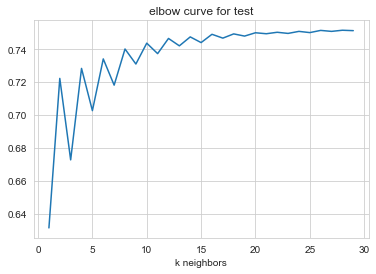

In [114]:
plt.plot(k,val)
plt.xlabel('k neighbors')
plt.title('elbow curve for test')

In [115]:
d = {'k': k,'val' : val}
d = pd.DataFrame(d)
d.sort_values(by=['val'],ascending=False)

,k,val
27,28,0.751532
25,26,0.751433
28,29,0.751285
26,27,0.750840
23,24,0.750840
21,22,0.750297
24,25,0.750099
19,20,0.750000
22,23,0.749605
20,21,0.749407


In [116]:
clf = KNN(n_neighbors = 28) #creating an instance/object of KNN
clf.fit(train_X, train_y) #fitting the model on just the TRAIN data
y_pred = clf.predict(val_X)
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(clf.score(val_X,val_y)))

Accuracy of Decision Tree Classifier on test set: 0.7515


## gradientboostclassifier

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(train_X, train_y) #fitting the model on just the TRAIN data
y_pred = model.predict(val_X)
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(model.score(val_X,val_y)))

Accuracy of Decision Tree Classifier on test set: 0.7531


In [118]:
# from numpy import mean
# from numpy import std
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# model = GradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), std(n_scores)))

### lgbclassifier

In [119]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(train_X, train_y) #fitting the model on just the TRAIN data
y_pred = lgbm.predict(val_X)
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(lgbm.score(val_X,val_y)))

Accuracy of Decision Tree Classifier on test set: 0.7605


In [120]:
from scipy.stats import randint
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }
#just applying cross validation(as this is the parameter which is fed in gridsearchcv)((*****IMPORTANT *******))
cv=KFold(n_splits=10,shuffle = True, random_state = 42)
#here these are the parameters of gridsearchcv(*****IMPORTANT *******)
rsc = RandomizedSearchCV(lgbm,param_grid,cv=cv,verbose=2,random_state = 42,n_jobs=-1)
rsc.fit(train_X, train_y)
y_pred = rsc.predict(val_X)
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(rsc.score(val_X,val_y)))
# # Print the tuned parameters and score 
# print("Tuned Decision Tree Parameters: {}".format(rsc.best_params_)) 
# print("Best score is {}".format(rsc.best_score_)) 

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished


Accuracy of Decision Tree Classifier on test set: 0.7605


In [121]:
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(rsc.best_params_)) 
print("Best score is {}".format(rsc.best_score_)) 

Tuned Decision Tree Parameters: {'reg_alpha': 0.1, 'num_leaves': 31, 'min_data_in_leaf': 50, 'lambda_l2': 1, 'lambda_l1': 1}
Best score is 0.7632065219464986


## randomforest classifier

In [122]:
#Importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier

In [123]:
#creating a random forest instance   #while initializing no parameter
rfr = RandomForestClassifier(random_state=56)

In [124]:
rfr.fit(train_X, train_y)
y_pred = rfr.predict(val_X)
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(rfr.score(val_X,val_y)))

Accuracy of Decision Tree Classifier on test set: 0.7519


In [125]:
from sklearn.model_selection import RandomizedSearchCV  #initializing parameter now
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [126]:
# Use the random grid to search for best hyperparameters  #done to check which are best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,
                               n_iter = 1, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfr_random.fit(train_X, train_y)
y_pred = rfr_random.predict(val_X)
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(rfr_random.score(val_X,val_y)))

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  3.7min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.3min finished


Accuracy of Decision Tree Classifier on test set: 0.7527


## catboost

In [127]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(train_X, train_y) #fitting the model on just the TRAIN data
y_pred = model.predict(val_X)
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(model.score(val_X,val_y)))

Learning rate set to 0.067256
0:	learn: 0.6597934	total: 94.9ms	remaining: 1m 34s
1:	learn: 0.6321312	total: 113ms	remaining: 56.4s
2:	learn: 0.6090902	total: 134ms	remaining: 44.6s
3:	learn: 0.5898747	total: 153ms	remaining: 38.2s
4:	learn: 0.5744635	total: 173ms	remaining: 34.4s
5:	learn: 0.5612262	total: 193ms	remaining: 31.9s
6:	learn: 0.5503907	total: 212ms	remaining: 30.1s
7:	learn: 0.5410603	total: 233ms	remaining: 28.9s
8:	learn: 0.5338947	total: 253ms	remaining: 27.9s
9:	learn: 0.5271140	total: 274ms	remaining: 27.2s
10:	learn: 0.5223086	total: 295ms	remaining: 26.6s
11:	learn: 0.5188312	total: 319ms	remaining: 26.2s
12:	learn: 0.5146910	total: 341ms	remaining: 25.9s
13:	learn: 0.5117052	total: 363ms	remaining: 25.6s
14:	learn: 0.5085643	total: 386ms	remaining: 25.3s
15:	learn: 0.5059507	total: 410ms	remaining: 25.2s
16:	learn: 0.5043182	total: 434ms	remaining: 25.1s
17:	learn: 0.5032286	total: 458ms	remaining: 25s
18:	learn: 0.5019095	total: 484ms	remaining: 25s
19:	learn: 0.

161:	learn: 0.4741000	total: 4.77s	remaining: 24.7s
162:	learn: 0.4739988	total: 4.8s	remaining: 24.7s
163:	learn: 0.4739403	total: 4.83s	remaining: 24.6s
164:	learn: 0.4738725	total: 4.86s	remaining: 24.6s
165:	learn: 0.4737722	total: 4.89s	remaining: 24.6s
166:	learn: 0.4736971	total: 4.93s	remaining: 24.6s
167:	learn: 0.4736479	total: 4.96s	remaining: 24.6s
168:	learn: 0.4735737	total: 5s	remaining: 24.6s
169:	learn: 0.4734965	total: 5.03s	remaining: 24.6s
170:	learn: 0.4734108	total: 5.06s	remaining: 24.5s
171:	learn: 0.4733435	total: 5.09s	remaining: 24.5s
172:	learn: 0.4732801	total: 5.13s	remaining: 24.5s
173:	learn: 0.4732215	total: 5.16s	remaining: 24.5s
174:	learn: 0.4731191	total: 5.19s	remaining: 24.5s
175:	learn: 0.4730278	total: 5.22s	remaining: 24.5s
176:	learn: 0.4728052	total: 5.25s	remaining: 24.4s
177:	learn: 0.4727409	total: 5.28s	remaining: 24.4s
178:	learn: 0.4726567	total: 5.32s	remaining: 24.4s
179:	learn: 0.4725944	total: 5.36s	remaining: 24.4s
180:	learn: 0.47

321:	learn: 0.4615042	total: 9.57s	remaining: 20.2s
322:	learn: 0.4614367	total: 9.6s	remaining: 20.1s
323:	learn: 0.4613653	total: 9.63s	remaining: 20.1s
324:	learn: 0.4612726	total: 9.66s	remaining: 20.1s
325:	learn: 0.4611899	total: 9.7s	remaining: 20s
326:	learn: 0.4611606	total: 9.72s	remaining: 20s
327:	learn: 0.4610896	total: 9.75s	remaining: 20s
328:	learn: 0.4610228	total: 9.79s	remaining: 20s
329:	learn: 0.4609539	total: 9.81s	remaining: 19.9s
330:	learn: 0.4608899	total: 9.84s	remaining: 19.9s
331:	learn: 0.4608202	total: 9.87s	remaining: 19.9s
332:	learn: 0.4607486	total: 9.9s	remaining: 19.8s
333:	learn: 0.4607377	total: 9.93s	remaining: 19.8s
334:	learn: 0.4606785	total: 9.95s	remaining: 19.8s
335:	learn: 0.4605767	total: 9.98s	remaining: 19.7s
336:	learn: 0.4605064	total: 10s	remaining: 19.7s
337:	learn: 0.4604278	total: 10s	remaining: 19.6s
338:	learn: 0.4603694	total: 10.1s	remaining: 19.6s
339:	learn: 0.4602964	total: 10.1s	remaining: 19.6s
340:	learn: 0.4602202	total

484:	learn: 0.4505174	total: 14.2s	remaining: 15.1s
485:	learn: 0.4504576	total: 14.2s	remaining: 15.1s
486:	learn: 0.4503755	total: 14.3s	remaining: 15s
487:	learn: 0.4503048	total: 14.3s	remaining: 15s
488:	learn: 0.4502423	total: 14.3s	remaining: 15s
489:	learn: 0.4501846	total: 14.3s	remaining: 14.9s
490:	learn: 0.4500853	total: 14.4s	remaining: 14.9s
491:	learn: 0.4499980	total: 14.4s	remaining: 14.9s
492:	learn: 0.4499317	total: 14.4s	remaining: 14.8s
493:	learn: 0.4498694	total: 14.4s	remaining: 14.8s
494:	learn: 0.4498245	total: 14.5s	remaining: 14.8s
495:	learn: 0.4497437	total: 14.5s	remaining: 14.7s
496:	learn: 0.4496844	total: 14.5s	remaining: 14.7s
497:	learn: 0.4496172	total: 14.6s	remaining: 14.7s
498:	learn: 0.4495431	total: 14.6s	remaining: 14.7s
499:	learn: 0.4494881	total: 14.6s	remaining: 14.6s
500:	learn: 0.4494242	total: 14.7s	remaining: 14.6s
501:	learn: 0.4493599	total: 14.7s	remaining: 14.6s
502:	learn: 0.4492967	total: 14.7s	remaining: 14.6s
503:	learn: 0.4492

647:	learn: 0.4403900	total: 18.9s	remaining: 10.3s
648:	learn: 0.4403405	total: 18.9s	remaining: 10.2s
649:	learn: 0.4402947	total: 19s	remaining: 10.2s
650:	learn: 0.4402378	total: 19s	remaining: 10.2s
651:	learn: 0.4401772	total: 19s	remaining: 10.1s
652:	learn: 0.4400990	total: 19s	remaining: 10.1s
653:	learn: 0.4400130	total: 19.1s	remaining: 10.1s
654:	learn: 0.4399497	total: 19.1s	remaining: 10.1s
655:	learn: 0.4398908	total: 19.1s	remaining: 10s
656:	learn: 0.4398423	total: 19.2s	remaining: 10s
657:	learn: 0.4397999	total: 19.2s	remaining: 9.97s
658:	learn: 0.4397512	total: 19.2s	remaining: 9.94s
659:	learn: 0.4396804	total: 19.2s	remaining: 9.91s
660:	learn: 0.4396216	total: 19.3s	remaining: 9.88s
661:	learn: 0.4395549	total: 19.3s	remaining: 9.86s
662:	learn: 0.4394927	total: 19.3s	remaining: 9.82s
663:	learn: 0.4394154	total: 19.4s	remaining: 9.8s
664:	learn: 0.4393580	total: 19.4s	remaining: 9.77s
665:	learn: 0.4392943	total: 19.4s	remaining: 9.74s
666:	learn: 0.4392376	tot

806:	learn: 0.4308398	total: 23.5s	remaining: 5.62s
807:	learn: 0.4307637	total: 23.5s	remaining: 5.59s
808:	learn: 0.4307139	total: 23.6s	remaining: 5.56s
809:	learn: 0.4306577	total: 23.6s	remaining: 5.53s
810:	learn: 0.4306148	total: 23.6s	remaining: 5.5s
811:	learn: 0.4305595	total: 23.6s	remaining: 5.47s
812:	learn: 0.4304996	total: 23.7s	remaining: 5.44s
813:	learn: 0.4304487	total: 23.7s	remaining: 5.41s
814:	learn: 0.4303783	total: 23.7s	remaining: 5.38s
815:	learn: 0.4303199	total: 23.7s	remaining: 5.36s
816:	learn: 0.4302470	total: 23.8s	remaining: 5.33s
817:	learn: 0.4301780	total: 23.8s	remaining: 5.3s
818:	learn: 0.4301063	total: 23.8s	remaining: 5.27s
819:	learn: 0.4300567	total: 23.9s	remaining: 5.24s
820:	learn: 0.4299973	total: 23.9s	remaining: 5.21s
821:	learn: 0.4299286	total: 23.9s	remaining: 5.18s
822:	learn: 0.4298739	total: 24s	remaining: 5.15s
823:	learn: 0.4298255	total: 24s	remaining: 5.13s
824:	learn: 0.4297514	total: 24s	remaining: 5.09s
825:	learn: 0.429667

969:	learn: 0.4213584	total: 28.1s	remaining: 870ms
970:	learn: 0.4212919	total: 28.2s	remaining: 841ms
971:	learn: 0.4212353	total: 28.2s	remaining: 812ms
972:	learn: 0.4211819	total: 28.2s	remaining: 783ms
973:	learn: 0.4211241	total: 28.3s	remaining: 754ms
974:	learn: 0.4210801	total: 28.3s	remaining: 725ms
975:	learn: 0.4210249	total: 28.3s	remaining: 696ms
976:	learn: 0.4209704	total: 28.3s	remaining: 667ms
977:	learn: 0.4209277	total: 28.4s	remaining: 638ms
978:	learn: 0.4208637	total: 28.4s	remaining: 609ms
979:	learn: 0.4208071	total: 28.4s	remaining: 580ms
980:	learn: 0.4207375	total: 28.5s	remaining: 551ms
981:	learn: 0.4206865	total: 28.5s	remaining: 522ms
982:	learn: 0.4206061	total: 28.5s	remaining: 493ms
983:	learn: 0.4205415	total: 28.5s	remaining: 464ms
984:	learn: 0.4204942	total: 28.6s	remaining: 435ms
985:	learn: 0.4204290	total: 28.6s	remaining: 406ms
986:	learn: 0.4203806	total: 28.6s	remaining: 377ms
987:	learn: 0.4203181	total: 28.7s	remaining: 348ms
988:	learn: 

## svm

In [128]:
# from sklearn.svm import SVC
# model = SVC(kernel='rbf',C=30,gamma='auto') #fit model on training data and chcek score of test data
# model.fit(train_X, train_y)
# model.score(val_X, val_y)

## pca

In [129]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 3) 
  
X_train = pca.fit_transform(train_X) 
X_test = pca.transform(val_X) 
  
explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([0.20228386, 0.20201197, 0.20006223])

In [130]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train, train_y) #fitting the model on just the TRAIN data
y_pred = model.predict(X_test)
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(model.score(X_test,val_y)))

Accuracy of Decision Tree Classifier on test set: 0.7522


In [131]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(X_train, train_y) #fitting the model on just the TRAIN data
y_pred = model.predict(X_test)
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(model.score(X_test,val_y)))

Learning rate set to 0.067256
0:	learn: 0.6744777	total: 20.7ms	remaining: 20.7s
1:	learn: 0.6583747	total: 34.8ms	remaining: 17.3s
2:	learn: 0.6444516	total: 57.4ms	remaining: 19.1s
3:	learn: 0.6324563	total: 79.6ms	remaining: 19.8s
4:	learn: 0.6220895	total: 106ms	remaining: 21s
5:	learn: 0.6131381	total: 126ms	remaining: 20.9s
6:	learn: 0.6054168	total: 147ms	remaining: 20.8s
7:	learn: 0.5987526	total: 169ms	remaining: 20.9s
8:	learn: 0.5929878	total: 189ms	remaining: 20.8s
9:	learn: 0.5880235	total: 207ms	remaining: 20.5s
10:	learn: 0.5837322	total: 227ms	remaining: 20.4s
11:	learn: 0.5800183	total: 246ms	remaining: 20.3s
12:	learn: 0.5768088	total: 270ms	remaining: 20.5s
13:	learn: 0.5740360	total: 288ms	remaining: 20.3s
14:	learn: 0.5716345	total: 306ms	remaining: 20.1s
15:	learn: 0.5695508	total: 326ms	remaining: 20s
16:	learn: 0.5677535	total: 348ms	remaining: 20.1s
17:	learn: 0.5661953	total: 376ms	remaining: 20.5s
18:	learn: 0.5648271	total: 399ms	remaining: 20.6s
19:	learn: 

161:	learn: 0.5532980	total: 3.8s	remaining: 19.7s
162:	learn: 0.5532526	total: 3.83s	remaining: 19.7s
163:	learn: 0.5532284	total: 3.86s	remaining: 19.7s
164:	learn: 0.5532104	total: 3.9s	remaining: 19.7s
165:	learn: 0.5531963	total: 3.92s	remaining: 19.7s
166:	learn: 0.5531708	total: 3.95s	remaining: 19.7s
167:	learn: 0.5531462	total: 3.98s	remaining: 19.7s
168:	learn: 0.5531151	total: 4.04s	remaining: 19.8s
169:	learn: 0.5530889	total: 4.07s	remaining: 19.9s
170:	learn: 0.5530609	total: 4.09s	remaining: 19.8s
171:	learn: 0.5530399	total: 4.12s	remaining: 19.8s
172:	learn: 0.5530077	total: 4.15s	remaining: 19.8s
173:	learn: 0.5529764	total: 4.18s	remaining: 19.8s
174:	learn: 0.5529405	total: 4.22s	remaining: 19.9s
175:	learn: 0.5529204	total: 4.25s	remaining: 19.9s
176:	learn: 0.5528984	total: 4.28s	remaining: 19.9s
177:	learn: 0.5528778	total: 4.32s	remaining: 19.9s
178:	learn: 0.5528492	total: 4.35s	remaining: 19.9s
179:	learn: 0.5528203	total: 4.37s	remaining: 19.9s
180:	learn: 0.

326:	learn: 0.5485026	total: 8.21s	remaining: 16.9s
327:	learn: 0.5484830	total: 8.23s	remaining: 16.9s
328:	learn: 0.5484567	total: 8.26s	remaining: 16.8s
329:	learn: 0.5484334	total: 8.28s	remaining: 16.8s
330:	learn: 0.5484151	total: 8.3s	remaining: 16.8s
331:	learn: 0.5483922	total: 8.33s	remaining: 16.8s
332:	learn: 0.5483649	total: 8.36s	remaining: 16.7s
333:	learn: 0.5483349	total: 8.38s	remaining: 16.7s
334:	learn: 0.5483019	total: 8.41s	remaining: 16.7s
335:	learn: 0.5482748	total: 8.43s	remaining: 16.7s
336:	learn: 0.5482489	total: 8.45s	remaining: 16.6s
337:	learn: 0.5482230	total: 8.48s	remaining: 16.6s
338:	learn: 0.5481806	total: 8.51s	remaining: 16.6s
339:	learn: 0.5481502	total: 8.53s	remaining: 16.6s
340:	learn: 0.5481275	total: 8.55s	remaining: 16.5s
341:	learn: 0.5481107	total: 8.58s	remaining: 16.5s
342:	learn: 0.5480779	total: 8.6s	remaining: 16.5s
343:	learn: 0.5480500	total: 8.63s	remaining: 16.5s
344:	learn: 0.5480245	total: 8.65s	remaining: 16.4s
345:	learn: 0.

487:	learn: 0.5443410	total: 12.4s	remaining: 13s
488:	learn: 0.5443139	total: 12.4s	remaining: 13s
489:	learn: 0.5442907	total: 12.5s	remaining: 13s
490:	learn: 0.5442712	total: 12.5s	remaining: 13s
491:	learn: 0.5442468	total: 12.5s	remaining: 12.9s
492:	learn: 0.5442233	total: 12.5s	remaining: 12.9s
493:	learn: 0.5441961	total: 12.6s	remaining: 12.9s
494:	learn: 0.5441717	total: 12.6s	remaining: 12.9s
495:	learn: 0.5441482	total: 12.6s	remaining: 12.8s
496:	learn: 0.5441208	total: 12.7s	remaining: 12.8s
497:	learn: 0.5440908	total: 12.7s	remaining: 12.8s
498:	learn: 0.5440789	total: 12.7s	remaining: 12.8s
499:	learn: 0.5440540	total: 12.7s	remaining: 12.7s
500:	learn: 0.5440313	total: 12.8s	remaining: 12.7s
501:	learn: 0.5440036	total: 12.8s	remaining: 12.7s
502:	learn: 0.5439771	total: 12.8s	remaining: 12.7s
503:	learn: 0.5439523	total: 12.8s	remaining: 12.6s
504:	learn: 0.5439283	total: 12.9s	remaining: 12.6s
505:	learn: 0.5439055	total: 12.9s	remaining: 12.6s
506:	learn: 0.543888

652:	learn: 0.5404474	total: 16.6s	remaining: 8.83s
653:	learn: 0.5404301	total: 16.6s	remaining: 8.8s
654:	learn: 0.5404034	total: 16.7s	remaining: 8.78s
655:	learn: 0.5403869	total: 16.7s	remaining: 8.75s
656:	learn: 0.5403590	total: 16.7s	remaining: 8.73s
657:	learn: 0.5403276	total: 16.8s	remaining: 8.71s
658:	learn: 0.5403083	total: 16.8s	remaining: 8.68s
659:	learn: 0.5402827	total: 16.8s	remaining: 8.66s
660:	learn: 0.5402632	total: 16.8s	remaining: 8.64s
661:	learn: 0.5402419	total: 16.9s	remaining: 8.61s
662:	learn: 0.5402207	total: 16.9s	remaining: 8.58s
663:	learn: 0.5401949	total: 16.9s	remaining: 8.56s
664:	learn: 0.5401725	total: 16.9s	remaining: 8.53s
665:	learn: 0.5401422	total: 17s	remaining: 8.51s
666:	learn: 0.5401147	total: 17s	remaining: 8.48s
667:	learn: 0.5400898	total: 17s	remaining: 8.46s
668:	learn: 0.5400662	total: 17s	remaining: 8.43s
669:	learn: 0.5400468	total: 17.1s	remaining: 8.4s
670:	learn: 0.5400348	total: 17.1s	remaining: 8.38s
671:	learn: 0.5400168	

814:	learn: 0.5368486	total: 20.8s	remaining: 4.73s
815:	learn: 0.5368187	total: 20.9s	remaining: 4.71s
816:	learn: 0.5367951	total: 20.9s	remaining: 4.68s
817:	learn: 0.5367713	total: 20.9s	remaining: 4.65s
818:	learn: 0.5367512	total: 21s	remaining: 4.63s
819:	learn: 0.5367265	total: 21s	remaining: 4.61s
820:	learn: 0.5367093	total: 21s	remaining: 4.58s
821:	learn: 0.5366865	total: 21s	remaining: 4.55s
822:	learn: 0.5366693	total: 21.1s	remaining: 4.53s
823:	learn: 0.5366489	total: 21.1s	remaining: 4.5s
824:	learn: 0.5366267	total: 21.1s	remaining: 4.48s
825:	learn: 0.5366047	total: 21.1s	remaining: 4.45s
826:	learn: 0.5365928	total: 21.2s	remaining: 4.43s
827:	learn: 0.5365739	total: 21.2s	remaining: 4.4s
828:	learn: 0.5365490	total: 21.2s	remaining: 4.38s
829:	learn: 0.5365200	total: 21.2s	remaining: 4.35s
830:	learn: 0.5364977	total: 21.3s	remaining: 4.33s
831:	learn: 0.5364805	total: 21.3s	remaining: 4.3s
832:	learn: 0.5364651	total: 21.3s	remaining: 4.27s
833:	learn: 0.5364402	t

973:	learn: 0.5335641	total: 24.9s	remaining: 664ms
974:	learn: 0.5335404	total: 24.9s	remaining: 639ms
975:	learn: 0.5335265	total: 24.9s	remaining: 613ms
976:	learn: 0.5335137	total: 25s	remaining: 587ms
977:	learn: 0.5334925	total: 25s	remaining: 562ms
978:	learn: 0.5334644	total: 25s	remaining: 536ms
979:	learn: 0.5334454	total: 25s	remaining: 511ms
980:	learn: 0.5334261	total: 25.1s	remaining: 485ms
981:	learn: 0.5334030	total: 25.1s	remaining: 460ms
982:	learn: 0.5333839	total: 25.1s	remaining: 434ms
983:	learn: 0.5333631	total: 25.1s	remaining: 409ms
984:	learn: 0.5333375	total: 25.2s	remaining: 383ms
985:	learn: 0.5333333	total: 25.2s	remaining: 358ms
986:	learn: 0.5333162	total: 25.2s	remaining: 332ms
987:	learn: 0.5332968	total: 25.2s	remaining: 307ms
988:	learn: 0.5332689	total: 25.3s	remaining: 281ms
989:	learn: 0.5332453	total: 25.3s	remaining: 256ms
990:	learn: 0.5332226	total: 25.3s	remaining: 230ms
991:	learn: 0.5332005	total: 25.4s	remaining: 204ms
992:	learn: 0.533185

## adaboostclassifier

In [132]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.7545661197865191


In [ ]:
# # compare ensemble to each baseline classifier
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import StackingClassifier
# from matplotlib import pyplot



# # get a stacking ensemble of models
# def get_stacking():
#     # define the base models
#     level0 = list()
#     level0.append(('logreg', LogisticRegression()))
#     level0.append(('xgb',XGBClassifier()))
#     level0.append(('model',LinearDiscriminantAnalysis()))
#     level0.append(('clf',KNN(n_neighbors = 1)))
#     level0.append(('lgbm',LGBMClassifier()))
#     level0.append(('rfr_random',RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,
#                                n_iter = 1, cv = 10, verbose=2, random_state=42, n_jobs = -1)))
#     level0.append(('model',CatBoostClassifier()))
    
# 	# define meta learner model
#     level1 = LogisticRegression()
# 	# define the stacking ensemble
#     model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
#     return model

# # get a list of models to evaluate
# def get_models():
#     models = dict()
#     models['logreg'] = LogisticRegression()
#     models['xgb'] = XGBClassifier()
#     models['model'] = LinearDiscriminantAnalysis()
#     models['clf'] = KNN(n_neighbors = 1)
#     models['lgbm'] = LGBMClassifier()
#     models['rfr_random'] = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,
#                                n_iter = 1, cv = 10, verbose=2, random_state=42, n_jobs = -1)
#     models['model'] = CatBoostClassifier()
#     models['stacking'] = get_stacking()
#     return models

# # evaluate a give model using cross-validation
# def evaluate_model(model, X, y):
#     cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#     scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#     return scores

# # define dataset
# X = data.drop(['C'],axis=1)
# y = data['C']
# # get the models to evaluate
# models = get_models()
# # evaluate the models and store results
# results, names = list(), list()
# for name, model in models.items():
#     scores = evaluate_model(model, X, y)
#     results.append(scores)
#     names.append(name)
#     print(('>%s %.3f (%.3f)' % (name, mean(scores), std(scores))))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()

#### ensembling could be performed in order to increase accuracy (Since the dataset was big, I have left this part, as it was taking a lot of time for processing)

In [134]:
test.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
0,T30234341,0.654765,0.812009,0.603190,0.391039,-5220,4825,-1784,7447,-7147,...,8074343777,5553595074,9/17/1996,8/18/1990,1,1,436,478,1,1
1,T30234342,0.694636,0.690568,0.473460,0.259760,-618,-5018,2012,9259,9267,...,-5556861821,2216284070,11/7/1985,4/11/1990,1,1,138,56,10,4
2,T30234343,0.203759,0.323301,0.492294,0.011448,-8778,6141,6965,3774,4303,...,-2121815725,-315409510,7/9/1984,5/4/1997,1,1,117,323,10,1
3,T30234344,0.319627,0.286247,0.906197,0.093840,-7929,4471,7715,9543,335,...,1389754605,-3360224957,6/3/1987,7/1/1988,1,1,115,149,16,21
4,T30234345,0.236003,0.782784,0.285689,0.383585,-3296,4564,-1580,-8559,-27,...,3653338555,7604838279,7/17/1984,12/3/1993,1,1,527,281,3,1


In [135]:
test['F15'] = pd.to_datetime(test['F15'])

In [140]:
test['F16'] = pd.to_datetime(test['F16'])
date = pd.DataFrame(test['F15'])
date['F16'] = test['F16']
date['year'] = test['F15'].dt.year
date['month'] = test['F15'].dt.month
date['day'] = test['F15'].dt.day
date['year1'] = test['F16'].dt.year

In [141]:
date

,F15,F16,year,month,day,year1
0,1996-09-17,1990-08-18,1996,9,17,1990
1,1985-11-07,1990-04-11,1985,11,7,1990
2,1984-07-09,1997-05-04,1984,7,9,1997
3,1987-06-03,1988-07-01,1987,6,3,1988
4,1984-07-17,1993-12-03,1984,7,17,1993
...,...,...,...,...,...,...
19908,1988-05-31,1988-10-19,1988,5,31,1988
19909,1991-04-03,1990-03-01,1991,4,3,1990
19910,1997-04-27,1992-11-24,1997,4,27,1992
19911,1994-11-03,1990-11-30,1994,11,3,1990


In [143]:
data = pd.DataFrame(test['F1'])

In [144]:
data[['F2','F3','F4','F5','F6','F10','F11','F12','F13','F14','F17','F18','F19','F20']] = test[['F2','F3','F4','F5','F6','F10','F11','F12','F13','F14','F17','F18','F19','F20']]

In [145]:
data[['year','year1']] = date[['year','year1']]
data.head()

,F1,F2,F3,F4,F5,F6,F10,F11,F12,F13,F14,F17,F18,F19,F20,year,year1
0,0.654765,0.812009,0.603190,0.391039,-5220,4825,-3461806391,8178108368,-8674321652,8074343777,5553595074,1,1,436,478,1996,1990
1,0.694636,0.690568,0.473460,0.259760,-618,-5018,-36253473,-6531193961,1849753082,-5556861821,2216284070,1,1,138,56,1985,1990
2,0.203759,0.323301,0.492294,0.011448,-8778,6141,5354243488,8053401796,782597920,-2121815725,-315409510,1,1,117,323,1984,1997
3,0.319627,0.286247,0.906197,0.093840,-7929,4471,7405036171,-2666864618,-8649240595,1389754605,-3360224957,1,1,115,149,1987,1988
4,0.236003,0.782784,0.285689,0.383585,-3296,4564,-6351599280,-2152422738,4768902493,3653338555,7604838279,1,1,527,281,1984,1993


In [146]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)
scaled_data.head()

,F1,F2,F3,F4,F5,F6,F10,F11,F12,F13,F14,F17,F18,F19,F20,year,year1
0,0.654755,0.812013,0.603160,0.391073,0.23900,0.741287,0.326913,0.908905,0.066262,0.903723,0.777684,0.0,0.0,0.483333,0.530000,0.757576,0.521739
1,0.694628,0.690569,0.473404,0.259767,0.46910,0.249112,0.498204,0.173397,0.592481,0.222075,0.610812,0.0,0.0,0.152222,0.061111,0.424242,0.521739
2,0.203728,0.323294,0.492242,0.011406,0.06110,0.807090,0.767749,0.902669,0.539121,0.393849,0.484223,0.0,0.0,0.128889,0.357778,0.393939,0.826087
3,0.319601,0.286239,0.906229,0.093815,0.10355,0.723586,0.870297,0.366624,0.067516,0.569451,0.331976,0.0,0.0,0.126667,0.164444,0.484848,0.434783
4,0.235974,0.782787,0.285594,0.383617,0.33520,0.728236,0.182412,0.392348,0.738442,0.682645,0.880250,0.0,0.0,0.584444,0.311111,0.393939,0.652174


In [147]:
test1 = scaled_data

In [148]:
test1.head()

,F1,F2,F3,F4,F5,F6,F10,F11,F12,F13,F14,F17,F18,F19,F20,year,year1
0,0.654755,0.812013,0.603160,0.391073,0.23900,0.741287,0.326913,0.908905,0.066262,0.903723,0.777684,0.0,0.0,0.483333,0.530000,0.757576,0.521739
1,0.694628,0.690569,0.473404,0.259767,0.46910,0.249112,0.498204,0.173397,0.592481,0.222075,0.610812,0.0,0.0,0.152222,0.061111,0.424242,0.521739
2,0.203728,0.323294,0.492242,0.011406,0.06110,0.807090,0.767749,0.902669,0.539121,0.393849,0.484223,0.0,0.0,0.128889,0.357778,0.393939,0.826087
3,0.319601,0.286239,0.906229,0.093815,0.10355,0.723586,0.870297,0.366624,0.067516,0.569451,0.331976,0.0,0.0,0.126667,0.164444,0.484848,0.434783
4,0.235974,0.782787,0.285594,0.383617,0.33520,0.728236,0.182412,0.392348,0.738442,0.682645,0.880250,0.0,0.0,0.584444,0.311111,0.393939,0.652174


In [155]:
test_original.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
0,T30234341,0.654765,0.812009,0.603190,0.391039,-5220,4825,-1784,7447,-7147,...,8074343777,5553595074,9/17/1996,8/18/1990,1,1,436,478,1,1
1,T30234342,0.694636,0.690568,0.473460,0.259760,-618,-5018,2012,9259,9267,...,-5556861821,2216284070,11/7/1985,4/11/1990,1,1,138,56,10,4
2,T30234343,0.203759,0.323301,0.492294,0.011448,-8778,6141,6965,3774,4303,...,-2121815725,-315409510,7/9/1984,5/4/1997,1,1,117,323,10,1
3,T30234344,0.319627,0.286247,0.906197,0.093840,-7929,4471,7715,9543,335,...,1389754605,-3360224957,6/3/1987,7/1/1988,1,1,115,149,16,21
4,T30234345,0.236003,0.782784,0.285689,0.383585,-3296,4564,-1580,-8559,-27,...,3653338555,7604838279,7/17/1984,12/3/1993,1,1,527,281,3,1


In [156]:
y_pred = lgbm.predict(test1)
test_original=pd.DataFrame({'Index': test_original['Index'],'Predicted':y_pred})  
test_original.head(20)

,Index,Predicted
0,T30234341,1
1,T30234342,1
2,T30234343,1
3,T30234344,1
4,T30234345,1
5,T30234346,1
6,T30234347,1
7,T30234348,1
8,T30234349,1
9,T30234350,1


In [158]:
test_original.to_csv(r"C:\Users\sanjay\Desktop\Haikujam\BuyAffinity_Test.txt")